In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)

In [79]:
#Basic Cleaning

In [80]:
url = 'https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=xlsx'
airbnb = pd.ExcelFile(url)
airbnb.sheet_names

['amsterdam_weekdays',
 'amsterdam_weekends',
 'athens_weekdays',
 'athens_weekends',
 'berlin_weekends',
 'berlin_weekdays',
 'barcelona_weekdays',
 'barcelona_weekends',
 'budapest_weekdays',
 'budapest_weekends',
 'lisbon_weekdays',
 'lisbon_weekends',
 'london_weekdays',
 'london_weekends',
 'paris_weekdays',
 'paris_weekends',
 'rome_weekdays',
 'rome_weekends',
 'vienna_weekdays',
 'vienna_weekends']

In [81]:
airbnbdf= pd.read_excel(airbnb, sheet_name='amsterdam_weekdays')
airbnbdf.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [82]:
airbnbdf = pd.read_excel(url, sheet_name=None)
for sheet, data in airbnbdf.items():
    data["sheet_name"] = sheet
df = pd.concat(airbnbdf.values(), ignore_index=True)
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


In [83]:
df.shape

(51707, 21)

In [84]:
df['City'] = df['sheet_name'].str.split('_').str[0].str.capitalize()

In [85]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna_weekends,Vienna
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna_weekends,Vienna
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna_weekends,Vienna
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna_weekends,Vienna


In [86]:
city_to_country = {
    'Amsterdam': 'Netherlands',
    'Athens': 'Greece',
    'Berlin': 'Germany',
    'Barcelona': 'Spain',
    'Budapest': 'Hungary',
    'Lisbon': 'Portugal',
    'London': 'United Kingdom',
    'Paris': 'France',
    'Rome': 'Italy',
    'Vienna': 'Austria'
}
df['Country'] = df['City'].map(city_to_country)
df['Weekday/Weekend'] = df['sheet_name'].str.split('_').str[-1].str.capitalize().str.rstrip('s')
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna_weekends,Vienna,Austria,Weekend
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna_weekends,Vienna,Austria,Weekend
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna_weekends,Vienna,Austria,Weekend
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna_weekends,Vienna,Austria,Weekend


In [87]:
df.rename(columns={'realSum': 'Price'}, inplace=True)
df.head()

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday


In [88]:
df.drop(columns='Unnamed: 0',inplace=True)

In [89]:
df.head()

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday


In [90]:
#Advanced Cleaning

In [91]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [92]:
def get_room_type(row):
    if row['room_shared']:
        return 'Shared'
    elif row['room_private']:
        return 'Private'
    else:
        return 'Unknown'
df['room_category'] = df.apply(get_room_type, axis=1)
df = df.drop(columns=['room_shared', 'room_private'])
df.head()

,Price,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend,room_category
0,194.033698,Private room,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Private
1,344.245776,Private room,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Private
2,264.101422,Private room,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Private
3,433.529398,Private room,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Private
4,485.552926,Private room,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Private


In [93]:
room_cat = df.pop('room_category')
df.insert(2, 'room_category', room_cat)
df.head()

,Price,room_type,room_category,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
0,194.033698,Private room,Private,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
1,344.245776,Private room,Private,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
2,264.101422,Private room,Private,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
3,433.529398,Private room,Private,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
4,485.552926,Private room,Private,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday


In [94]:
def host_type(row):
    if row['multi']:
        return 'Two to Four'
    elif row['biz']:
        return 'More than Four'
    else:
        return 'Only One'
df['Host_listings'] = df.apply(host_type, axis=1)
df = df.drop(columns=['multi', 'biz'])
df.head()

,Price,room_type,room_category,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend,Host_listings
0,194.033698,Private room,Private,2,False,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Two to Four
1,344.245776,Private room,Private,4,False,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Only One
2,264.101422,Private room,Private,2,False,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,More than Four
3,433.529398,Private room,Private,4,False,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,More than Four
4,485.552926,Private room,Private,2,True,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,Only One


In [95]:
host_list = df.pop('Host_listings')
df.insert(5,'Host_listings', host_list)
df.head()

,Price,room_type,room_category,person_capacity,host_is_superhost,Host_listings,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
0,194.033698,Private room,Private,2,False,Two to Four,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
1,344.245776,Private room,Private,4,False,Only One,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
2,264.101422,Private room,Private,2,False,More than Four,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
3,433.529398,Private room,Private,4,False,More than Four,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday
4,485.552926,Private room,Private,2,True,Only One,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday


In [ ]:
#Some basic initial inspections

In [ ]:
#display the first, the last and a random sample of 7 entries

In [97]:
df.head(1)

,Price,room_type,room_category,person_capacity,host_is_superhost,Host_listings,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
0,194.033698,Private room,Private,2,False,Two to Four,10,93,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday


In [98]:
df.tail(1)

,Price,room_type,room_category,person_capacity,host_is_superhost,Host_listings,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
51706,133.230489,Private room,Private,4,True,Two to Four,10,93,1,1.263932,0.480903,150.450381,10.774264,225.247293,5.44414,16.39066,48.20811,vienna_weekends,Vienna,Austria,Weekend


In [119]:
random_sample = df.sample(7, random_state=42)
random_sample

,Price,room_type,room_category,person_capacity,host_is_superhost,Host_listings,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend
12395,160.821095,Private room,Private,4,True,Two to Four,8,88,1,4.795292,0.666605,176.133866,6.800732,297.124845,6.526835,2.18120,41.42950,barcelona_weekends,Barcelona,Spain,Weekend
44703,182.124237,Entire home/apt,Unknown,4,False,Only One,10,98,0,6.675412,0.411363,186.778096,4.138152,462.481905,10.076359,12.42200,41.90500,rome_weekends,Rome,Italy,Weekend
49956,658.672837,Entire home/apt,Unknown,6,False,More than Four,9,86,2,1.423964,0.148752,125.339104,8.975960,203.945695,4.929289,16.38206,48.22004,vienna_weekends,Vienna,Austria,Weekend
6129,133.339582,Entire home/apt,Unknown,5,False,Only One,10,96,2,1.657024,0.984947,101.973856,3.842144,131.349579,1.961567,23.74306,37.96193,athens_weekends,Athens,Greece,Weekend
3227,173.880440,Entire home/apt,Unknown,4,True,Two to Four,10,96,1,1.371064,0.170704,100.881520,3.803653,154.423345,11.595045,23.75058,37.97838,athens_weekdays,Athens,Greece,Weekday
5923,191.221616,Entire home/apt,Unknown,5,False,Two to Four,10,95,2,0.390960,0.377241,326.338626,12.295701,583.637300,8.716004,23.73100,37.97500,athens_weekends,Athens,Greece,Weekend
4506,150.212078,Entire home/apt,Unknown,4,False,Only One,9,94,2,3.437280,0.396319,49.821172,1.878465,73.139317,5.491745,23.73224,38.00642,athens_weekdays,Athens,Greece,Weekday


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_category               51707 non-null  object 
 3   person_capacity             51707 non-null  int64  
 4   host_is_superhost           51707 non-null  bool   
 5   Host_listings               51707 non-null  object 
 6   cleanliness_rating          51707 non-null  int64  
 7   guest_satisfaction_overall  51707 non-null  int64  
 8   bedrooms                    51707 non-null  int64  
 9   dist                        51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  attr_index                  51707 non-null  float64
 12  attr_index_norm             51707 non-null  float64
 13  rest_index                  517

In [122]:
df.describe()

,Price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [124]:
df.describe(exclude='number')

,room_type,room_category,host_is_superhost,Host_listings,sheet_name,City,Country,Weekday/Weekend
count,51707,51707,51707,51707,51707,51707,51707,51707
unique,3,3,2,3,20,10,10,2
top,Entire home/apt,Unknown,False,Only One,london_weekends,London,United Kingdom,Weekend
freq,32648,32648,38475,18534,5379,9993,9993,26207


In [125]:
#Exploratory guiding questions

In [126]:
#1.How many listings are in each city in total and also per type of day?

In [135]:
listing_per_city=df.groupby(['City']).size()
listing_per_city.to_frame(name='Total listings per city')

,Total listings per city
City,
Amsterdam,2080
Athens,5280
Barcelona,2833
Berlin,2484
Budapest,4022
Lisbon,5763
London,9993
Paris,6688
Rome,9027


In [137]:
listing_per_city_per_daytype=df.groupby(['City','Weekday/Weekend']).size()
listing_per_city_per_daytype.to_frame(name='Total listings per city per daytype')

Total listings per city per daytype
City      Weekday/Weekend                                     
Amsterdam Weekday                                         1103
          Weekend                                          977
Athens    Weekday                                         2653
          Weekend                                         2627
Barcelona Weekday                                         1555
          Weekend                                         1278
Berlin    Weekday                                         1284
          Weekend                                         1200
Budapest  Weekday                                         2074
          Weekend                                         1948
Lisbon    Weekday                                         2857
          Weekend                                         2906
London    Weekday                                         4614
          Weekend                                         5379
Paris     Weekday                                         3130
          Weekend                                         3558
Rome      Weekday                                         4492
          Weekend                                         4535
Vienna    Weekday                                         1738
          Weekend                                         1799

In [138]:
#2.Which city has the biggest proportion of superhosts?

In [156]:
superhost=df[df["host_is_superhost"]].groupby('City').size().to_frame(name='Superhosts_per_city').sort_values(by='Superhosts_per_city',ascending=False)
superhost

,Superhosts_per_city
City,
Rome,2949
Athens,2263
London,1573
Budapest,1524
Lisbon,1233
Vienna,1005
Paris,941
Berlin,639
Amsterdam,591


In [177]:
print("The city which has the biggest proportion of superhosts is:",superhost.idxmax()[0])

The city which has the biggest proportion of superhosts is: Rome


In [178]:
#3 Which cities have listings with more than four rooms?

In [191]:
print("Cities with listings having 4 or more bedrooms:",', '.join(df.loc[df["bedrooms"] >= 4, "City"].unique()))

Cities with listings having 4 or more bedrooms: Amsterdam, Athens, Berlin, Barcelona, Lisbon, London, Paris, Rome, Vienna


In [192]:
#4.Which city has the most entire home/apt type listings?

In [205]:
home_apt = df[df["room_type"]=="Entire home/apt"].groupby("City").size().to_frame(name="count").sort_values(by="count",ascending=False)
home_apt

,count
City,
Rome,5561
Paris,5067
Athens,4872
London,4384
Lisbon,3878
Budapest,3589
Vienna,2747
Amsterdam,1126
Berlin,882


In [206]:
print("The city which has the most entire home/apt type listings:",home_apt.idxmax()[0])

The city which has the most entire home/apt type listings: Rome


In [217]:
#5 Are ratings typically high across listings, or is there a wide variation? 

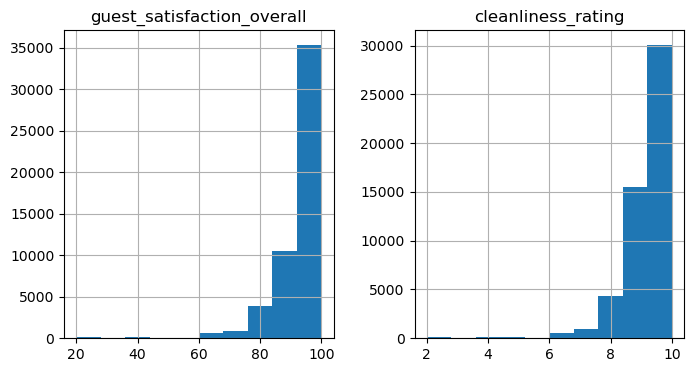

In [210]:
df[['guest_satisfaction_overall', 'cleanliness_rating']].hist(bins=10, figsize=(8,4))
plt.show()

In [ ]:
#from the histogram we can see that there is a wide variation in the ratings.

In [ ]:
#a. Plot the distribution of guest_satisfaction_overall ratings.  

<AxesSubplot:xlabel='guest_satisfaction_overall', ylabel='Density'>

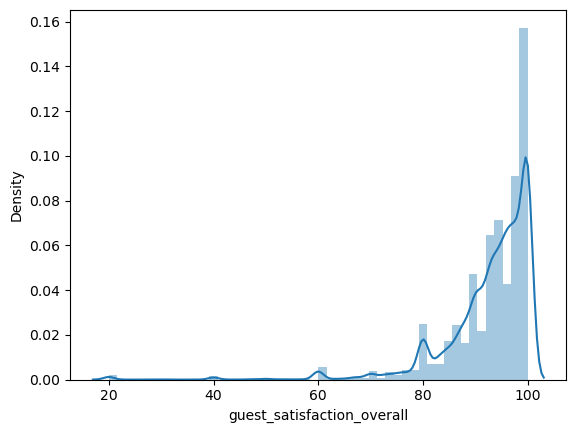

In [216]:
sns.distplot(df['guest_satisfaction_overall'],kde=True)

In [ ]:
#b.Examine the distribution of cleanliness_rating.

<AxesSubplot:xlabel='cleanliness_rating', ylabel='Density'>

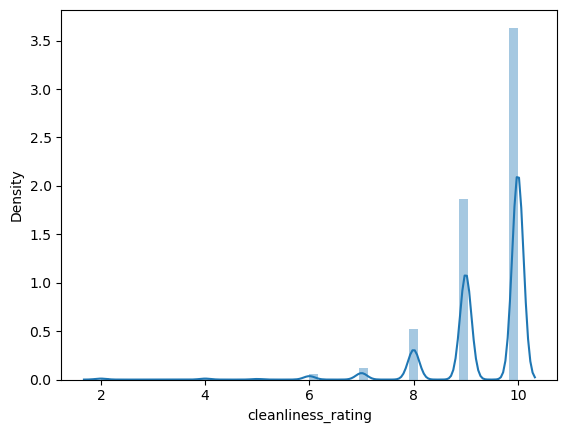

In [218]:
sns.distplot(df['cleanliness_rating'],kde=True)

In [219]:
#6.How does person_capacity vary across listings? What is the most common capacity of listings?

<AxesSubplot:xlabel='person_capacity', ylabel='Density'>

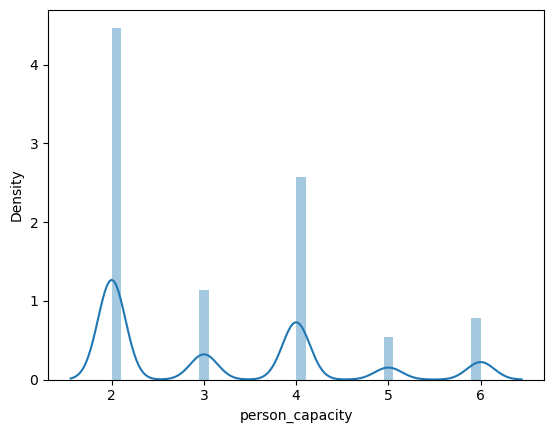

In [224]:
sns.distplot(df['person_capacity'],kde=True)

In [222]:
most_common_capacity = df['person_capacity'].mode()[0]
print("Most common person capacity of listings:", most_common_capacity)

Most common person capacity of listings: 2


In [225]:
#7. Plot the distribution of price (former realSum) for both weekday and weekend offers
#a.check normality, skewness, modality
#b.If skewed, consider using transformations (e.g. log); can you normalize it?


In [248]:
from scipy.stats import skew, kurtosis

In [240]:
weekday_prices = df[df['Weekday/Weekend']=='Weekday']['Price']
weekend_prices = df[df['Weekday/Weekend']=='Weekend']['Price']

Text(0.5, 1.0, 'Distribution of Weekday Prices')

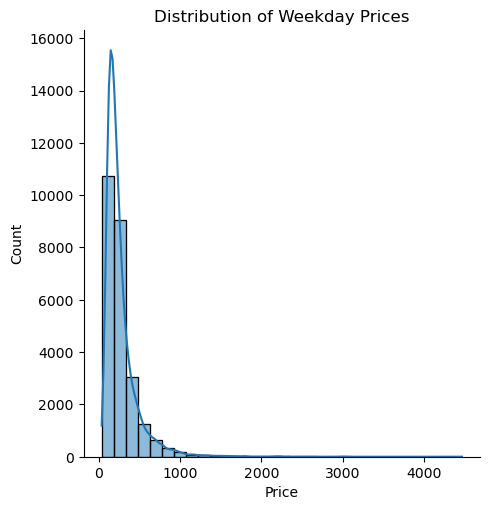

In [245]:
sns.displot(weekday_prices[weekday_prices<5000], bins=30, kde=True)
plt.title("Distribution of Weekday Prices")

In [253]:
skew(weekday_prices)

24.094061489931633

In [250]:
#positive skewness means right skewed distribution

In [254]:
kurtosis(weekday_prices)

939.0255169318408

In [252]:
#higher kurtosis means peaked distribution

In [261]:
from scipy.stats import shapiro
stat, p = shapiro(weekday_prices)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data seems normal")
else:
    print("Data is not normal")

Statistics=0.319, p=0.000
Data is not normal


In [264]:
#applying square root transform

In [267]:
weekday_prices_sqrt = np.sqrt(weekday_prices[weekday_prices<5000])

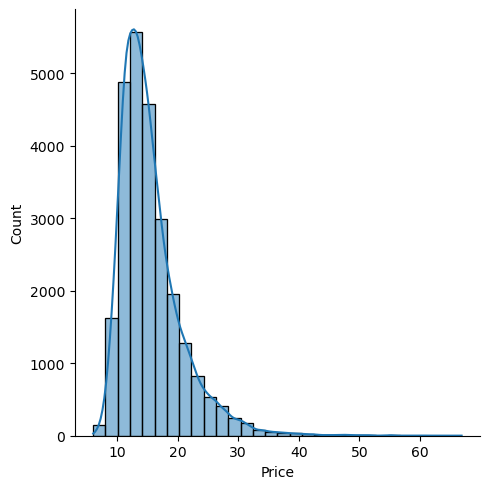

In [268]:
sns.displot(weekday_prices_sqrt[weekday_prices<5000], bins=30, kde=True)

Text(0.5, 1.0, 'Distribution of Weekend Prices')

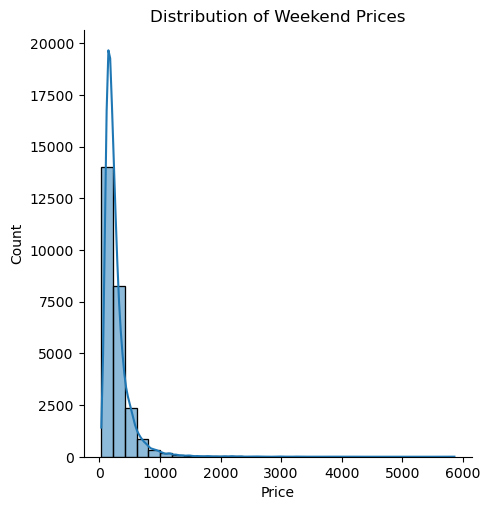

In [246]:
sns.displot(weekend_prices[weekend_prices<6000], bins=30, kde=True)
plt.title("Distribution of Weekend Prices")

In [255]:
skew(weekend_prices)

16.602198409689024

In [257]:
#positive skewness means right skewed distribution

In [256]:
kurtosis(weekend_prices)

565.6951641099274

In [258]:
#higher kurtosis means peaked distribution

In [260]:
from scipy.stats import shapiro
stat, p = shapiro(weekend_prices)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data seems normal")
else:
    print("Data is not normal")

Statistics=0.439, p=0.000
Data is not normal


In [269]:
#applying square root transform

In [271]:
weekend_prices_sqrt = np.sqrt(weekend_prices[weekend_prices<6000])

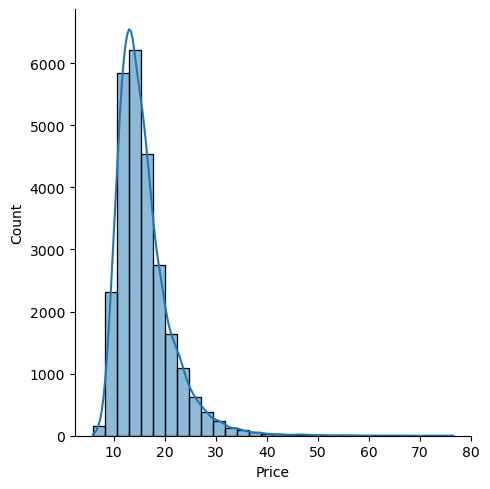

In [272]:
sns.displot(weekend_prices_sqrt[weekend_prices<6000], bins=30, kde=True)

In [262]:
#8.Is there a difference in price per night between two cities? Choose at least three pairs of cities during weekdays.

In [279]:
df["price_per_night"] = df["Price"]/2

In [280]:
df[(df["room_type"]=="Private room") & (df["Weekday/Weekend"]=="Weekday")]


,Price,room_type,room_category,person_capacity,host_is_superhost,Host_listings,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,City,Country,Weekday/Weekend,price_per_night
0,194.033698,Private room,Private,2,False,Two to Four,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,97.016849
1,344.245776,Private room,Private,4,False,Only One,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,172.122888
2,264.101422,Private room,Private,2,False,More than Four,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,132.050711
3,433.529398,Private room,Private,4,False,More than Four,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,216.764699
4,485.552926,Private room,Private,2,True,Only One,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,Amsterdam,Netherlands,Weekday,242.776463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49888,301.521632,Private room,Private,2,False,Two to Four,9,92,1,0.515181,0.486782,281.610851,20.167765,442.170026,10.570395,16.37002,48.21247,vienna_weekdays,Vienna,Austria,Weekday,150.760816
49896,242.152257,Private room,Private,2,False,Two to Four,9,95,1,0.773691,0.205514,198.670141,14.227906,341.186877,8.156319,16.37103,48.21526,vienna_weekdays,Vienna,Austria,Weekday,121.076128
49899,602.809527,Private room,Private,3,False,Only One,10,50,0,0.456125,0.236243,235.503011,16.865719,478.016228,11.427324,16.37939,48.21000,vienna_weekdays,Vienna,Austria,Weekday,301.404764
49901,359.488582,Private room,Private,5,False,More than Four,10,100,1,0.913691,0.318813,193.589966,13.864086,307.870192,7.359860,16.36758,48.21567,vienna_weekdays,Vienna,Austria,Weekday,179.744291
